In [1]:
# 라이브러리 임포트
import os
import pandas as pd
import chardet

# 사용자 정의함수 경로 설정
import sys
sys.path.append("G:/내 드라이브/Source/_Custom_Function")
# 사용자 정의함수 불러오기

import time

import ExcelFile_Merge as em
import ExcelFile_Read as er
import ExcelFile_EDA as ee

In [2]:
df_parquet_3 = pd.DataFrame()

---
## 서울특별시 공공자전거 대여소별 이용정보(시간대별)
- 서울특별시 공공자전거 대여소별 이용정보(시간대별)_2020.parquet
- 서울특별시 공공자전거 대여소별 이용정보(시간대별)_2021.parquet
- 서울특별시 공공자전거 대여소별 이용정보(시간대별)_2022.parquet
- 서울특별시 공공자전거 대여소별 이용정보(시간대별)_2023.parquet
- 서울특별시 공공자전거 대여소별 이용정보(시간대별)_2024.parquet

In [263]:
_year = '2020'
filepath = 'G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여소별 이용정보(시간대별)\\'
start_time = time.time()
df_parquet = pd.read_parquet(filepath + '서울특별시 공공자전거 대여소별 이용정보(시간대별)_' + _year + '.parquet')
print("read_parquet time :", time.time() - start_time)

read_parquet time : 4.4822328090667725


---
### 년도별,자치구별 - 따릉이이용량 확인

In [265]:
df_parquet.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2020-02-01,0,1442,1442. (구)신한은행 중랑교지점,정기권,None,~10대,1,53.86,0.32,1360.0,6
1,2020-02-01,0,1339,1339. 삼성전자서비스 성북센터,정기권,None,~10대,1,10.04,0.09,390.0,3
2,2020-02-01,0,1960,1960. 화광신문사 앞,정기권,None,~10대,1,75.14,0.64,2750.0,24
3,2020-02-01,0,394,394. 경희궁 자이 3단지,정기권,None,~10대,1,28.42,0.18,780.0,3
4,2020-02-01,0,1364,1364. 성북동 치안센터 앞,정기권,None,~10대,1,52.97,0.41,1760.0,11


In [266]:
# 0~6번 인덱스 위치에 각 한글 요일 이름이 담긴 리스트
weekday_list = ['월', '화', '수', '목', '금', '토', '일']

In [267]:
df_parquet['대여일자'] = pd.to_datetime(df_parquet['대여일자'], format='%Y-%m-%d')
df_parquet['요일_인덱스'] = df_parquet['대여일자'].dt.weekday
# apply 함수로 숫자 -> 요일 이름으로 변환
df_parquet['요일'] = df_parquet.apply(lambda x : weekday_list[x['요일_인덱스']], axis=1)

In [268]:
df_parquet['년'] = df_parquet['대여일자'].dt.year

In [269]:
print(df_parquet.shape)

(19026024, 15)


In [270]:
print(df_parquet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19026024 entries, 0 to 19026023
Data columns (total 15 columns):
 #   Column   Dtype         
---  ------   -----         
 0   대여일자     datetime64[ns]
 1   대여시간     int64         
 2   대여소번호    int64         
 3   대여소명     object        
 4   대여구분코드   object        
 5   성별       object        
 6   연령대코드    object        
 7   이용건수     int64         
 8   운동량      float64       
 9   탄소량      float64       
 10  이동거리(M)  float64       
 11  이용시간(분)  int64         
 12  요일_인덱스   int32         
 13  요일       object        
 14  년        int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(4), object(5)
memory usage: 2.0+ GB
None


In [271]:
df_parquet.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스,요일,년
0,2020-02-01,0,1442,1442. (구)신한은행 중랑교지점,정기권,None,~10대,1,53.86,0.32,1360.0,6,5,토,2020
1,2020-02-01,0,1339,1339. 삼성전자서비스 성북센터,정기권,None,~10대,1,10.04,0.09,390.0,3,5,토,2020
2,2020-02-01,0,1960,1960. 화광신문사 앞,정기권,None,~10대,1,75.14,0.64,2750.0,24,5,토,2020
3,2020-02-01,0,394,394. 경희궁 자이 3단지,정기권,None,~10대,1,28.42,0.18,780.0,3,5,토,2020
4,2020-02-01,0,1364,1364. 성북동 치안센터 앞,정기권,None,~10대,1,52.97,0.41,1760.0,11,5,토,2020


In [272]:
ee.ss_isnull(df_parquet)

,[컬럼명],[sum],[sum_isnull],[mean_isnull(%)]
0,대여일자,19026024,0,0.000000
1,대여시간,19026024,0,0.000000
2,대여소번호,19026024,0,0.000000
3,대여소명,19026024,0,0.000000
4,대여구분코드,19026024,0,0.000000
5,성별,9530047,9495977,49.910465
6,연령대코드,19026024,0,0.000000
7,이용건수,19026024,0,0.000000
8,운동량,18906625,119399,0.627556
9,탄소량,18906625,119399,0.627556


### 출퇴근시간, 평일 데이터조회

In [274]:
cond1 = df_parquet['대여시간'].isin([7, 8, 9, 17, 18, 19])
cond2 = df_parquet['요일'].isin(['월', '화', '수', '목', '금'])
df_parquet = df_parquet[cond1 & cond2]

In [275]:
df_parquet.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스,요일,년
46871,2020-02-03,7,505,505. 자양사거리 광진아크로텔 앞,정기권,None,~10대,1,15.21,0.14,600.0,3,0,월,2020
46872,2020-02-03,7,2363,2363. 강남 을지병원 교차로,정기권,None,~10대,1,22.20,0.22,950.0,6,0,월,2020
46873,2020-02-03,7,3511,3511. 응봉역 1번출구,정기권,None,~10대,1,101.49,1.08,4660.0,41,0,월,2020
46874,2020-02-03,7,1337,1337. 돈암성당 옆,정기권,None,~10대,1,93.80,0.87,3760.0,12,0,월,2020
46875,2020-02-03,7,1976,1976. 남구로역 5번 출입구 앞,정기권,None,~10대,1,0.00,0.00,0.0,7,0,월,2020


In [276]:
start_time = time.time()
df_parquet = df_parquet.groupby('대여소번호')[['이용건수', '이용시간(분)']].sum().reset_index()
print("groupby time :", time.time() - start_time)
df_parquet.head()

groupby time : 0.11308050155639648


,대여소번호,이용건수,이용시간(분)
0,3,71,1915
1,5,23,554
2,10,203,4366
3,101,2715,75785
4,102,8741,267003


In [277]:
df_parquet = df_parquet.astype({'대여소번호':'str'})

In [278]:
print(df_parquet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   대여소번호    2181 non-null   object
 1   이용건수     2181 non-null   int64 
 2   이용시간(분)  2181 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 51.2+ KB
None


In [279]:
df_parquet['대여소번호']  = df_parquet['대여소번호'].str.zfill(width=5)

In [280]:
df_parquet.head(1)

,대여소번호,이용건수,이용시간(분)
0,00003,71,1915


In [281]:
df_parquet.shape

(2181, 3)

---
## 대여소 정보

In [283]:
filepath = 'G:\\내 드라이브\\DataSet\\_파킷 파일\\서울시 공공자전거 대여소 정보\\'
filename = '공공자전거 대여소 정보_통합본.parquet'
start_time = time.time()
df_bikerental = pd.read_parquet(filepath + filename)
print("read_parquet time :", time.time() - start_time)

read_parquet time : 0.015882492065429688


In [284]:
df_bikerental = df_bikerental[['대여소번호', '대여소명', '자치구']]
df_bikerental.head()

,대여소번호,대여소명,자치구
20852,06173,서울자동차운전전문학원,강서구
19007,02902,공릉풍림아파트 108동,노원구
19015,02912,대진고등학교,노원구
19014,02911,상계역중앙시장,노원구
19013,02910,도깨비시장,노원구


In [285]:
df_parquet_2 = pd.merge(df_parquet, df_bikerental, on = '대여소번호', how = 'left')

In [286]:
df_parquet_2.head()

,대여소번호,이용건수,이용시간(분),대여소명,자치구
0,00003,71,1915,NaN,NaN
1,00005,23,554,NaN,NaN
2,00010,203,4366,NaN,NaN
3,00101,2715,75785,(구)합정동 주민센터,마포구
4,00102,8741,267003,망원역 1번출구 앞,마포구


In [287]:
ee.ss_isnull(df_parquet_2)

,[컬럼명],[sum],[sum_isnull],[mean_isnull(%)]
0,대여소번호,2181,0,0.000000
1,이용건수,2181,0,0.000000
2,이용시간(분),2181,0,0.000000
3,대여소명,2134,47,2.154975
4,자치구,2134,47,2.154975


In [288]:
df_parquet_2.shape[0]

2181

In [289]:
df_parquet_2 = df_parquet_2.groupby('자치구')[['이용건수', '이용시간(분)']].sum().reset_index()
df_parquet_2 = df_parquet_2.sort_values(by = '이용건수', ascending = False).head(10)

In [290]:
df_parquet_2

,자치구,이용건수,이용시간(분)
3,강서구,627866,12661005
19,영등포구,617547,16808696
17,송파구,489445,12728363
12,마포구,413285,12541705
5,광진구,321366,7932423
18,양천구,312538,7474937
8,노원구,309618,7817423
6,구로구,307510,7828484
15,성동구,306670,8689066
14,서초구,285831,8717706


In [291]:
df_parquet_2['년도'] = _year

In [292]:
df_parquet_2

,자치구,이용건수,이용시간(분),년도
3,강서구,627866,12661005,2020
19,영등포구,617547,16808696,2020
17,송파구,489445,12728363,2020
12,마포구,413285,12541705,2020
5,광진구,321366,7932423,2020
18,양천구,312538,7474937,2020
8,노원구,309618,7817423,2020
6,구로구,307510,7828484,2020
15,성동구,306670,8689066,2020
14,서초구,285831,8717706,2020


In [293]:
#df_parquet_3 = df_parquet_2

In [294]:
df_parquet_3 = pd.concat([df_parquet_3, df_parquet_2], axis=0, ignore_index=True)

In [356]:
cond1 = df_parquet_3['자치구'].isin(['강서구', '송파구'])
df_parquet_3[cond1][['년도', '자치구', '이용건수', '이용시간(분)']].sort_values(by=['년도', '이용건수'], ascending = [True, False])

,년도,자치구,이용건수,이용시간(분)
40,2020,강서구,627866.0,12661005.0
42,2020,송파구,489445.0,12728363.0
30,2021,강서구,1041028.0,16487119.0
32,2021,송파구,749244.0,16281886.0
0,2022,강서구,1723621.0,23820917.0
1,2022,송파구,1240462.0,23855260.0
10,2023,강서구,2030444.0,26523310.0
12,2023,송파구,1344330.0,25212380.0
20,2024,강서구,992337.0,12913837.0
22,2024,송파구,665997.0,12595976.0


In [296]:
del df_parquet
del df_parquet_2

---
### 년도별 top10 비교

In [338]:
# 패키지 임포트
import numpy as np                  # Numpy(넘파이) 패키지 임포트
import pandas as pd                 # pandas(판다스) 패키지 임포트
import matplotlib.pyplot as plt     # Matplotlib(맷플롯립) 패키지의 pyplot모듈을 plt로 임포트
from matplotlib import rcParams     # 한글 환경 설정을 위한 rcParams 임포트
import seaborn as sns               # seaborn(씨본) 패키지 임포트
import warnings

# 한글 환경 설정
def setting_styles_basic():
  rcParams['font.family'] = 'Malgun Gothic'     # Window
  #rcParams['font.family'] = 'NanumBarunGothic'    # Window
  # rcParams['font.family'] = 'AppleGothic'       # Max

  rcParams['axes.unicode_minus'] = False

setting_styles_basic()

# 경고창 무시
warnings.filterwarnings('ignore')

# 그래프의 스케일(scale)조정
sns.set_context('paper', # notebook, talk, poster
                rc = {
                    'font.size' : 10,
                    'xtick.labelsize' : 10,
                    'ytick.labelsize' : 10,
                    'axes.labelsize' : 10
                })

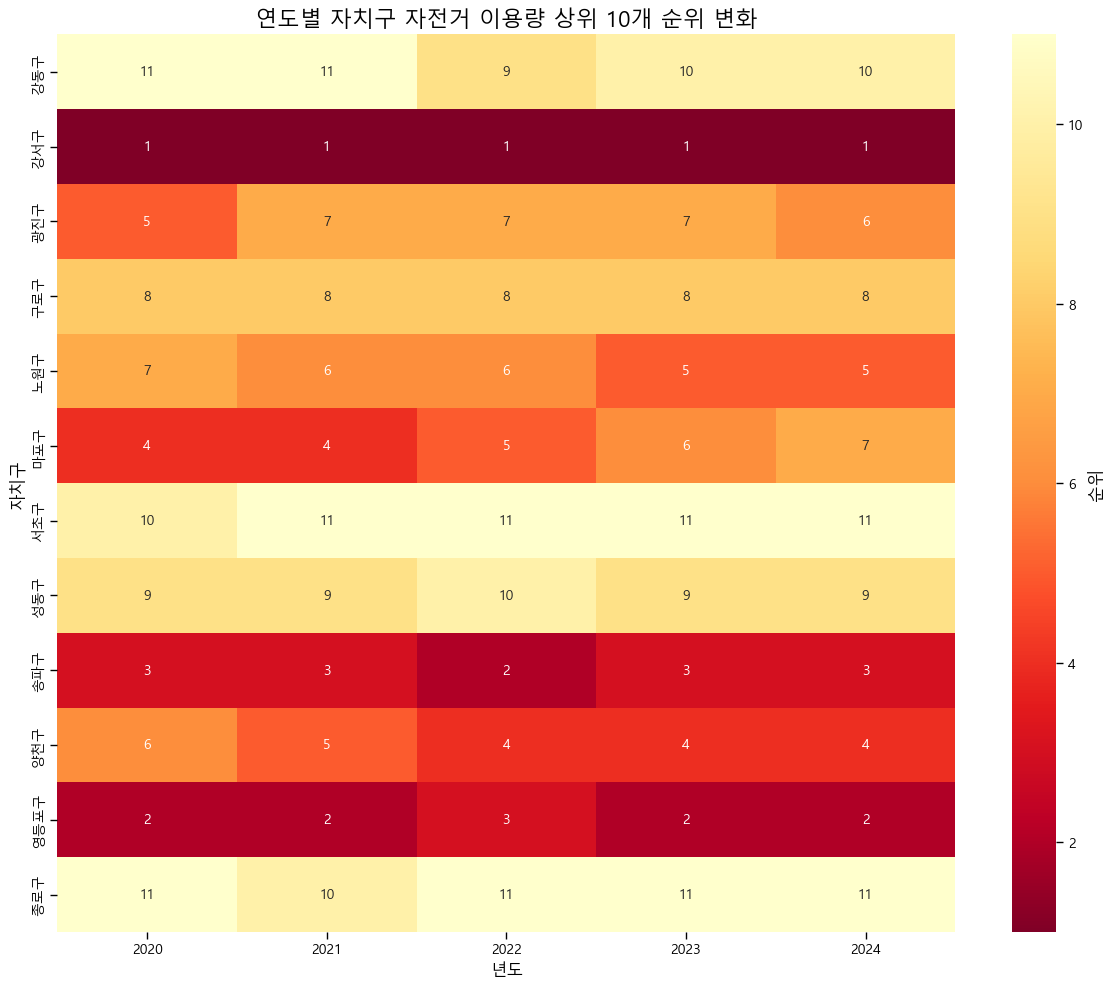

In [336]:
# 데이터 준비 (이미 df_parquet이 로드되어 있다고 가정)

# 년도별로 상위 10개 자치구 선택
top_10_by_year = df_parquet_3.groupby(['년도', '자치구'])['이용건수'].sum().reset_index()
top_10_by_year = top_10_by_year.sort_values(['년도', '이용건수'], ascending=[True, False])
top_10_by_year = top_10_by_year.groupby('년도').head(10)

# 순위 계산
top_10_by_year['순위'] = top_10_by_year.groupby('년도')['이용건수'].rank(ascending=False, method='min')

# 피벗 테이블 생성
pivot_data = top_10_by_year.pivot(index='자치구', columns='년도', values='순위')

# 결측값을 11로 채우기 (10위 밖의 순위)
pivot_data = pivot_data.fillna(11)

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_data, annot=True, cmap='YlOrRd_r', fmt='.0f')

plt.title('연도별 자치구 자전거 이용량 상위 10개 순위 변화', fontsize=16)
plt.xlabel('년도', fontsize=12)
plt.ylabel('자치구', fontsize=12)

# 컬러바 레이블 설정
cbar = plt.gcf().axes[-1]
cbar.set_ylabel('순위', fontsize=12)

plt.tight_layout()
plt.show()

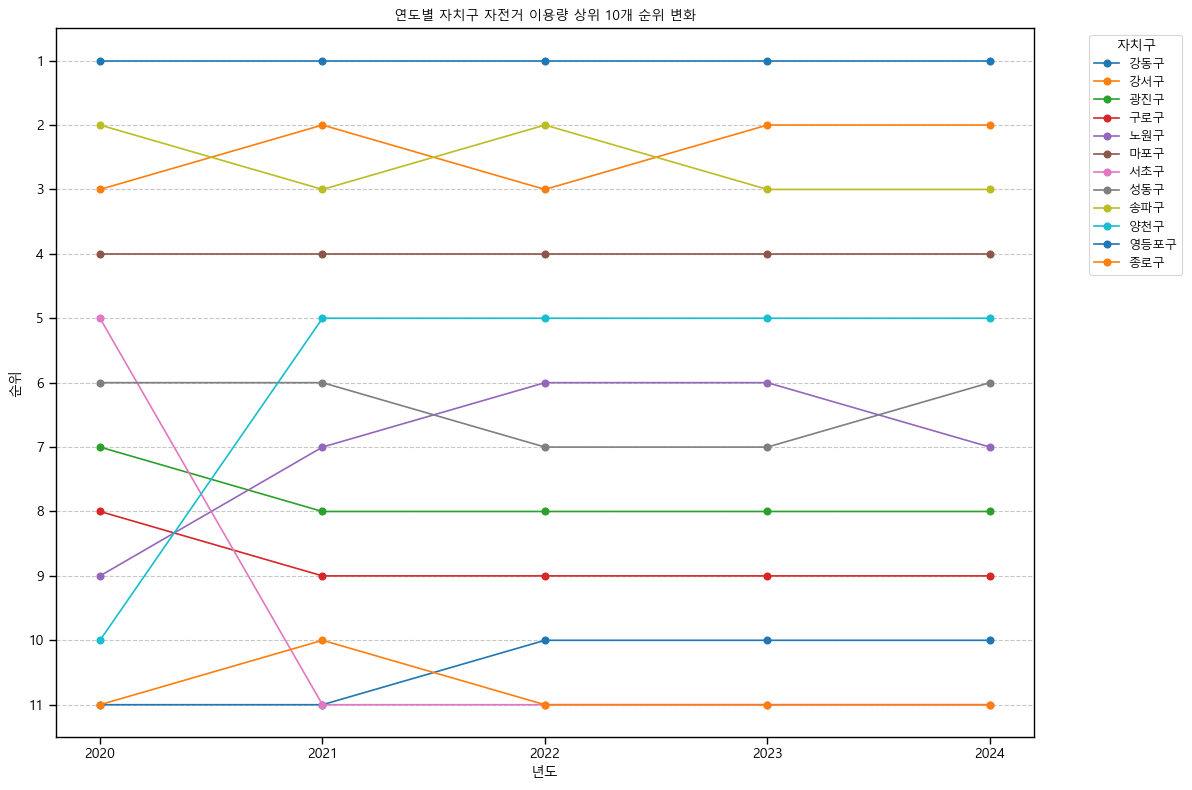

In [342]:
# 데이터 준비 (df_parquet가 이미 로드되어 있다고 가정)

# 년도별로 상위 10개 자치구 선택
top_10_by_year = df_parquet_3.groupby(['년도', '자치구'])['이용시간(분)'].sum().reset_index()
top_10_by_year = top_10_by_year.sort_values(['년도', '이용시간(분)'], ascending=[True, False])
top_10_by_year = top_10_by_year.groupby('년도').head(10)

# 순위 계산
top_10_by_year['순위'] = top_10_by_year.groupby('년도')['이용시간(분)'].rank(ascending=False, method='min')

# 피벗 테이블 생성
pivot_data = top_10_by_year.pivot(index='자치구', columns='년도', values='순위')

# 결측값을 11로 채우기 (10위 밖의 순위)
pivot_data = pivot_data.fillna(11)

# 그래프 그리기
plt.figure(figsize=(12, 8))
for idx, row in pivot_data.iterrows():
    plt.plot(pivot_data.columns, row.values, marker='o', label=idx)

plt.gca().invert_yaxis()  # y축 역순으로 표시 (1위가 위로 오도록)
plt.yticks(range(1, 12))  # y축 눈금 설정
plt.xlabel('년도')
plt.ylabel('순위')
plt.title('연도별 자치구 자전거 이용량 상위 10개 순위 변화')
plt.legend(title='자치구', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()